<a href="https://colab.research.google.com/github/hyunjaec/MScA_Deep_Learning_Project/blob/main/zoning_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

austin_df = pd.read_csv("/content/drive/My Drive/data/data/austin.csv")

In [7]:
austin_df.head()

,Unnamed: 0,image_name,zoning_id,zoning_zty
0,0,data/austin_0.jpg,229791,PUD
1,1,data/austin_1.jpg,229791,PUD
2,2,data/austin_2.jpg,400523442,I-RR
3,3,data/austin_3.jpg,229791,PUD
4,4,data/austin_4.jpg,229791,PUD


In [8]:
austin_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [19]:
%cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [22]:
import os 

images = [i for i in os.listdir() if i.endswith('jpg')]
len(images)

3667

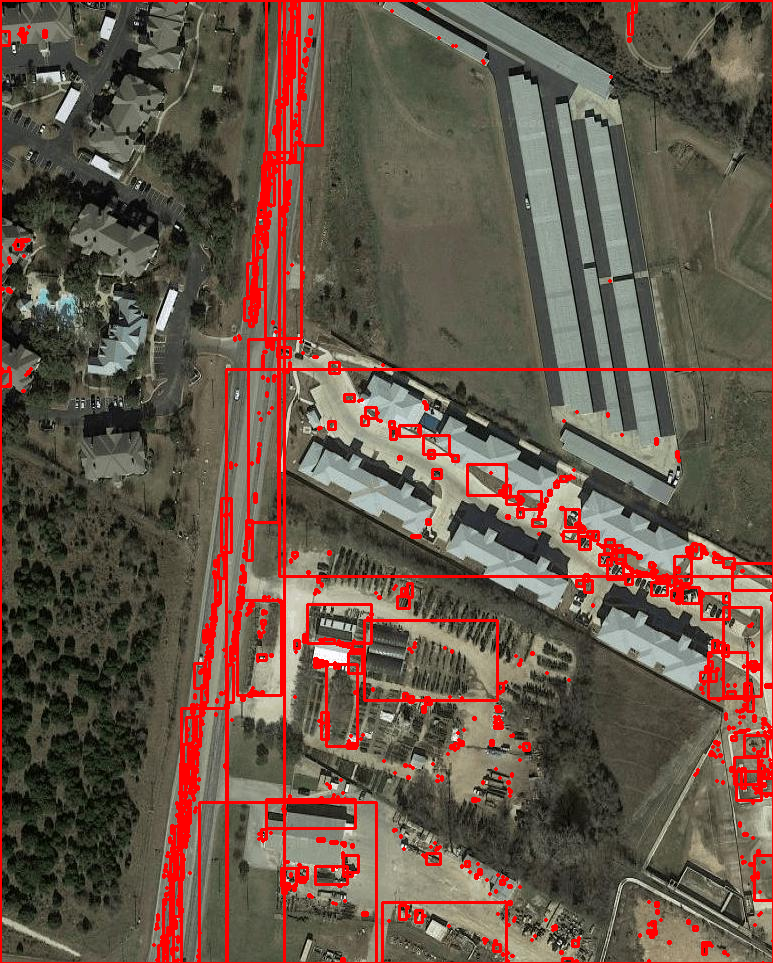

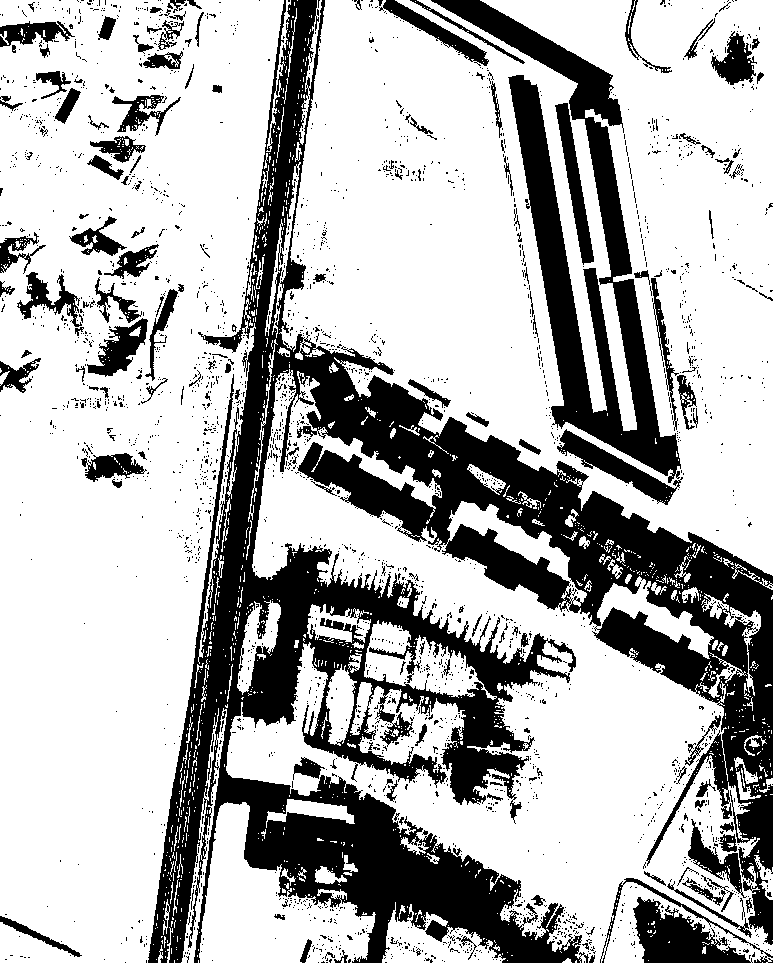

-1

In [28]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread(images[0])
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

ROI_number = 0
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)
    ROI = original[y:y+h, x:x+w]
    cv2.imwrite('Image_{}.png'.format(ROI_number), ROI)
    ROI_number += 1

cv2_imshow(image)
cv2_imshow(thresh)
cv2.waitKey()